In [32]:
import numpy as np  # Importing NumPy for numerical computations
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import glob  # Importing glob to handle file operations
import sklearn  # Importing scikit-learn for machine learning
import seaborn as sns  # Importing seaborn for advanced visualizations
from sklearn.model_selection import train_test_split  # Importing function to split data into train and test sets
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder to encode categorical variables
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for predictive modeling
from sklearn.feature_selection import SelectFromModel  # Importing feature selection method
from sklearn.model_selection import cross_val_score # Importing cross-validation score for model evaluation
import matplotlib  # Importing matplotlib for further styling
sns.set_theme()  # This applies Seaborn's default style

In [33]:
# Loading the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/train.csv')

### Exploration

In [34]:
# SibSp: number of siblings and spouses traveling with
# Parch: number of parents and children traveling with
# The embarkation : It has three possible values S,C,Q

df['Age'].fillna(df['Age'].median(), inplace=True)  # Filling missing values in the 'Age' column with the median age
df.describe()  # Displaying basic statistics of numerical features

<ipython-input-34-35d0f6a86980>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Filling missing values in the 'Age' column with the median age


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Women and Children First!')

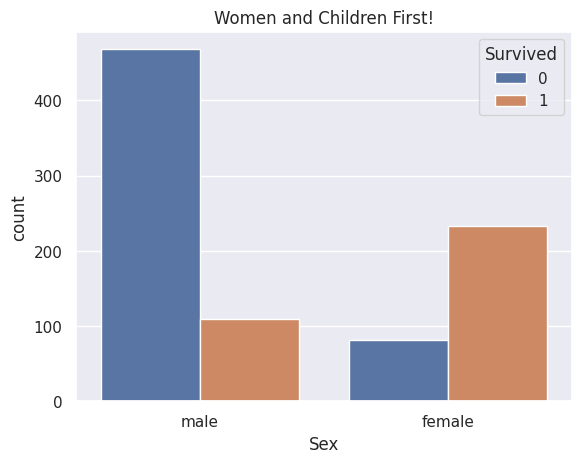

In [35]:
sns.countplot(x='Sex', hue='Survived', data=df)  # Creating a count plot for 'Sex' with hue based on 'Survived' column
plt.title("Women and Children First!")  # Setting the title of the plot


Text(0.5, 1.0, 'Women and Children First!')

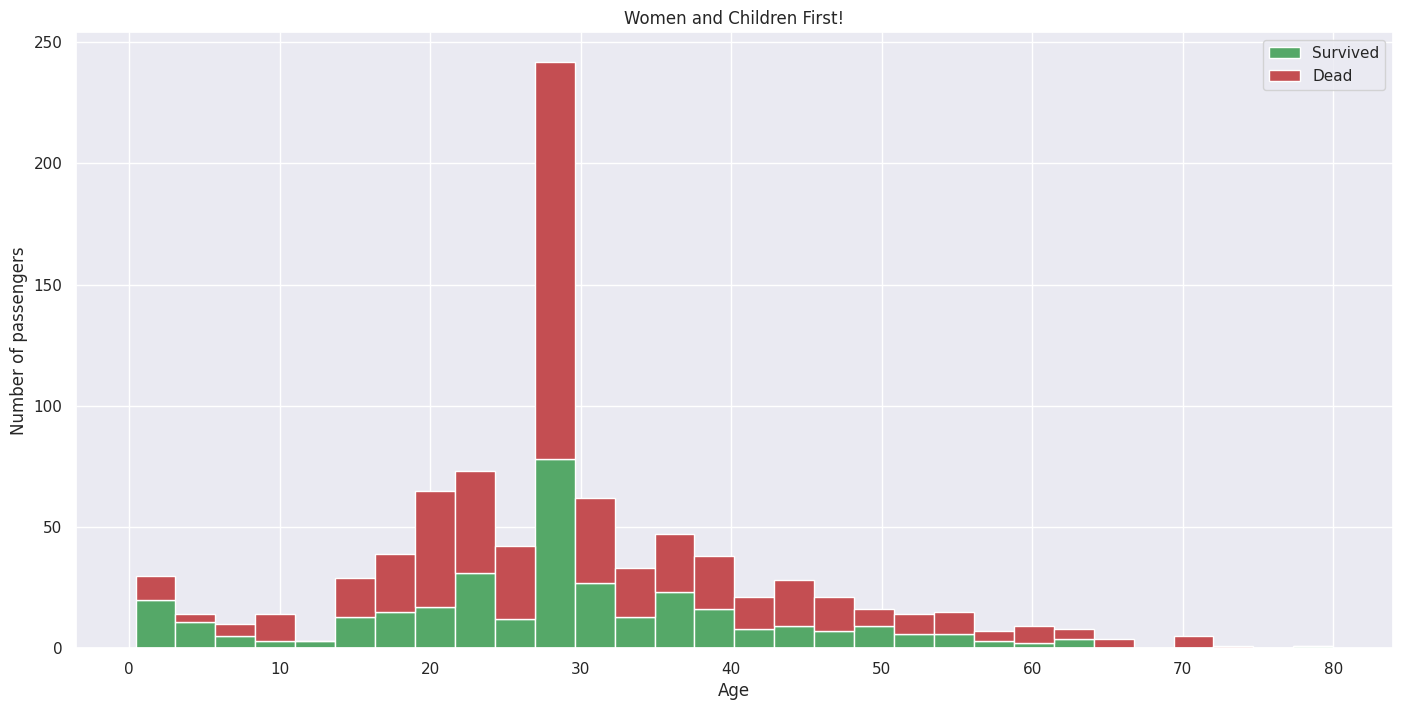

In [36]:
figure = plt.figure(figsize=(17,8))  # Creating a figure with specific size

# Plotting histogram for age distribution, separating survivors and non-survivors
plt.hist([df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],
         stacked=True, color=['g','r'], bins=30, label=['Survived', 'Dead'])

plt.xlabel('Age')  # Label for x-axis
plt.ylabel('Number of passengers')  # Label for y-axis
plt.legend()  # Displaying legend to differentiate survival status
plt.title("Women and Children First!")  # Setting the plot title


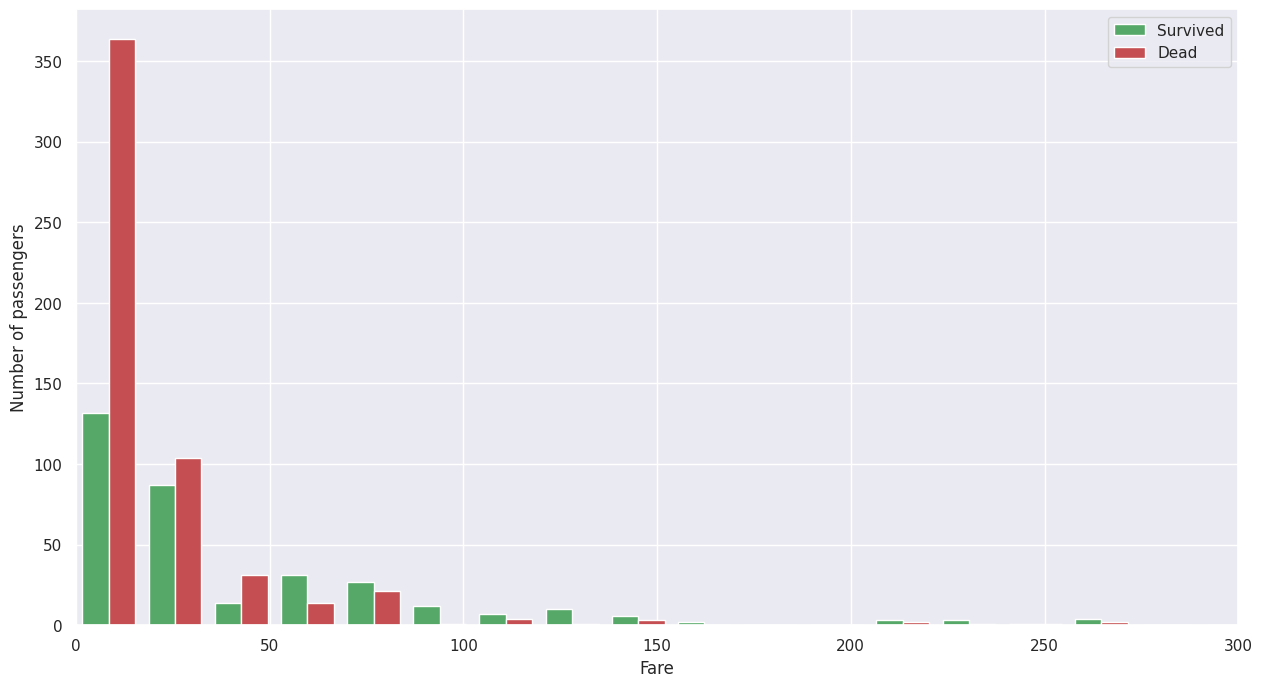

In [37]:
figure = plt.figure(figsize=(15,8))  # Create a new figure with a specified size (15 inches wide, 8 inches tall)

plt.hist([df[df['Survived']==1]['Fare'],  # Select the 'Fare' values of passengers who survived (Survived = 1)
          df[df['Survived']==0]['Fare']],  # Select the 'Fare' values of passengers who did not survive (Survived = 0)
         color=['g', 'r'],  # Assign colors: green ('g') for survivors and red ('r') for non-survivors
         bins=30,  # Divide the fare range into 30 bins for the histogram
         label=['Survived', 'Dead'])  # Set labels for the legend

plt.xlabel('Fare')  # Label the x-axis as "Fare"
plt.xlim([0, 300])  # Set the x-axis limits between 0 and 300 to exclude extreme outliers
plt.ylabel('Number of passengers')  # Label the y-axis as "Number of passengers"
plt.legend()  # Display the legend to distinguish between survivors and non-survivors

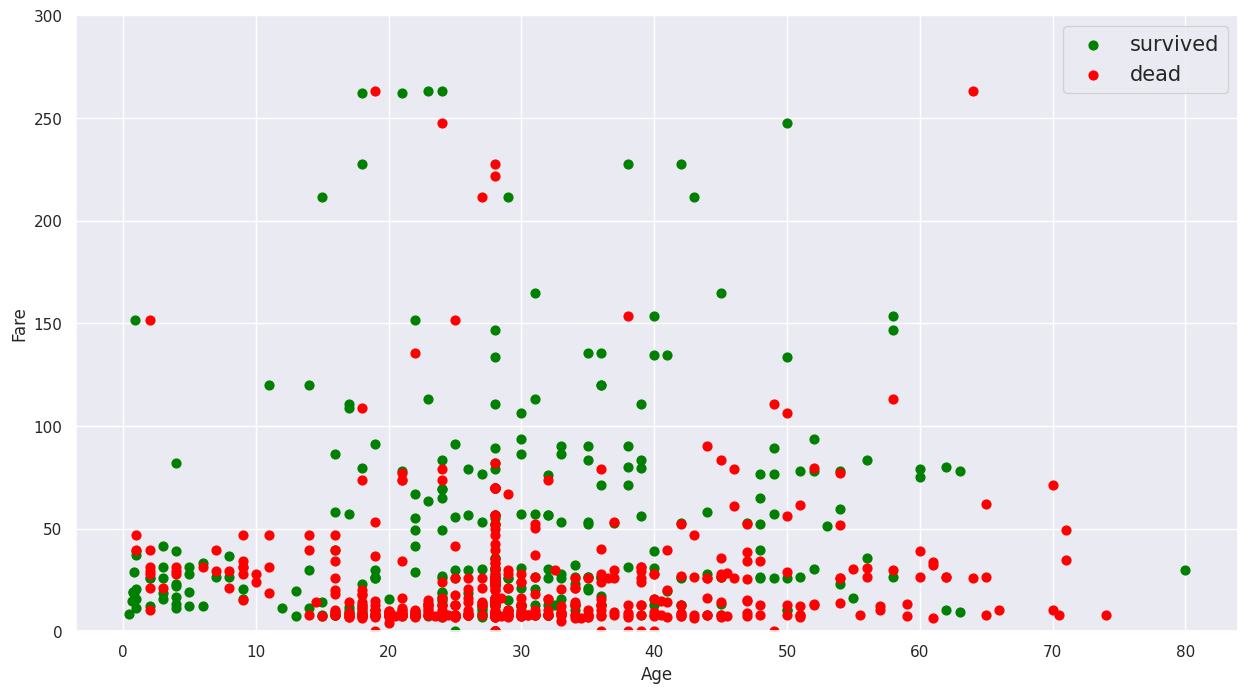

In [38]:
plt.figure(figsize=(15,8))  # Create a new figure with a specified size (15 inches wide, 8 inches tall)

ax = plt.subplot()  # Create a subplot (a single axes for plotting)

# Scatter plot for passengers who survived (Survived = 1)
ax.scatter(df[df['Survived']==1]['Age'],  # X-axis: Age of survivors
           df[df['Survived']==1]['Fare'],  # Y-axis: Fare of survivors
           c='green',  # Color: Green for survivors
           s=40)  # Size of scatter points

# Scatter plot for passengers who did not survive (Survived = 0)
ax.scatter(df[df['Survived']==0]['Age'],  # X-axis: Age of non-survivors
           df[df['Survived']==0]['Fare'],  # Y-axis: Fare of non-survivors
           c='red',  # Color: Red for non-survivors
           s=40)  # Size of scatter points

ax.set_xlabel('Age')  # Label the x-axis as "Age"
ax.set_ylabel('Fare')  # Label the y-axis as "Fare"
ax.set_ylim([0,300])  # Set the y-axis limits between 0 and 300 to exclude extreme fare values

# Add a legend to distinguish survivors and non-survivors
ax.legend(('survived', 'dead'),  # Legend labels
          scatterpoints=1,  # Number of points in the legend for each category
          loc='upper right',  # Position the legend in the upper-right corner
          fontsize=15)  # Set the legend font size


<Axes: xlabel='Embarked', ylabel='count'>

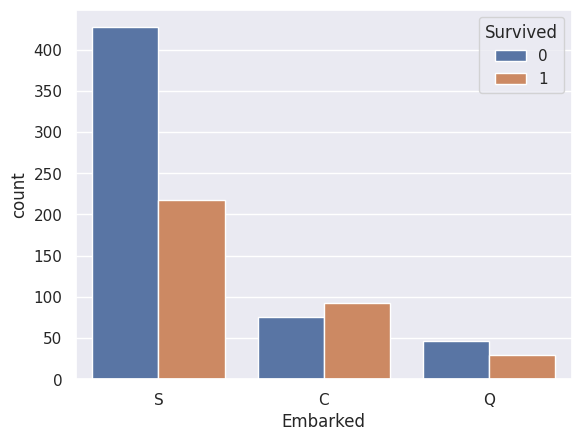

In [39]:
sns.countplot(x='Embarked', hue='Survived', data=df)  # Create a count plot of the 'Embarked' column with survival status as hue

### Feature Engineering

In [40]:
# Load the training dataset from 'train.csv' into a DataFrame
train = pd.read_csv('/content/train.csv')

# Load the test dataset from 'test.csv' into a DataFrame
test = pd.read_csv('/content/test.csv')

# Extract the 'Survived' column from the training dataset as the target variable
targets = train.Survived

# Drop the 'Survived' column from the training dataset, as it's the target variable
train.drop('Survived', axis=1, inplace=True)

# Concatenate the training and test datasets along the rows (axis=0) and reset the index
combined = pd.concat([train, test], ignore_index=True)

# Reset the index of the combined DataFrame (adds a new index column)
combined.reset_index(inplace=True)

# Drop the newly created 'index' column, as it's unnecessary
combined.drop('index', inplace=True, axis=1)

In [41]:
# Define a dictionary to map various titles to broader categories
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Lady" :      "Royalty"}
# Extract titles from passenger names in the 'Name' column
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
# Map extracted titles to their broader category using the Title_Dictionary
combined['Title'] = combined.Title.apply(lambda x:Title_Dictionary.get(x,x))

In [42]:
# Compute the median of numeric features for the training dataset
# grouped by 'Sex', 'Pclass', and 'Title'
grouped_median_train = combined.iloc[:len(train)].groupby(['Sex', 'Pclass', 'Title']).median(numeric_only=True)

# Compute the median of numeric features for the test dataset
# grouped by 'Sex', 'Pclass', and 'Title'
grouped_median_test = combined.iloc[len(train):].groupby(['Sex', 'Pclass', 'Title']).median(numeric_only=True)

In [43]:
def fillAges(row, grouped_median):
    """
    Function to fill missing values in the 'Age' column using the median age
    of passengers grouped by 'Sex', 'Pclass', and 'Title'.

    Parameters:
    row (Series): A row from the DataFrame being processed.
    grouped_median (DataFrame): A precomputed DataFrame containing median ages
                                for each group defined by 'Sex', 'Pclass', and 'Title'.

    Returns:
    float: The existing age if not missing, otherwise the median age of the corresponding group.
    """

    # Check if 'Age' is missing (NaN)
    if np.isnan(row['Age']):
        # Return the median age for the corresponding 'Sex', 'Pclass', and 'Title' group
        return grouped_median.loc[row['Sex'], row['Pclass'], row['Title']]['Age']
    else:
        # If 'Age' is not missing, return the existing value
        return row['Age']

In [44]:
# Fill missing 'Age' values for the training set portion of 'combined'
combined.loc[:len(train)-1, 'Age'] = combined.iloc[:len(train)].apply(lambda r: fillAges(r, grouped_median_train), axis=1)

# Fill missing 'Age' values for the test set portion of 'combined'
combined.loc[len(train):, 'Age'] = combined.iloc[len(train):].apply(lambda r: fillAges(r, grouped_median_test), axis=1)

In [45]:
# Check if the 'Name' column exists in the DataFrame before attempting to drop it
if 'Name' in combined.columns:
    # Drop the 'Name' column as it is no longer needed after extracting the 'Title'
    combined.drop('Name', axis=1, inplace=True)

In [46]:
# Initialize the LabelEncoder to convert categorical 'Title' values into numerical form
le_title = LabelEncoder()

# Apply Label Encoding on the 'Title' column to replace category names with numeric values
combined['Title'] = le_title.fit_transform(combined['Title'])

In [47]:
# Fill missing Fare values with the mean fare
combined.loc[:, 'Fare'] = combined['Fare'].fillna(combined['Fare'].mean())

# Fill missing Embarked values with 'S' (most common embarkation point)
combined.loc[:, 'Embarked'] = combined['Embarked'].fillna('S')

# Encode 'Embarked' column with LabelEncoder
le_embarked = LabelEncoder()
combined.loc[:, 'Embarked'] = le_embarked.fit_transform(combined['Embarked'])

# Fill missing Cabin values with 'U' (Unknown)
combined.loc[:, 'Cabin'] = combined['Cabin'].fillna('U')

# Convert Cabin values to string and extract the first letter (e.g., 'C85' → 'C')
combined.loc[:, 'Cabin'] = combined['Cabin'].astype(str).map(lambda c: c[0])

# Encode Cabin values with LabelEncoder
le_cabin = LabelEncoder()
combined.loc[:, 'Cabin'] = le_cabin.fit_transform(combined['Cabin'])

# Encode 'Sex' column with LabelEncoder
le_sex = LabelEncoder()
combined.loc[:, 'Sex'] = le_sex.fit_transform(combined['Sex'])


In [48]:
def cleanTicket(ticket):
    """
    Function to clean and standardize ticket numbers by removing unnecessary characters
    and extracting meaningful ticket prefixes.

    Parameters:
    ticket (str): The ticket number as a string.

    Returns:
    str: The cleaned ticket prefix, or 'XXX' if no prefix is found.
    """

    # Remove '.' (dots) from the ticket string
    ticket = ticket.replace('.', '')

    # Remove '/' (slashes) from the ticket string
    ticket = ticket.replace('/', '')

    # Split the ticket string into parts (separated by spaces)
    ticket = ticket.split()

    # Trim whitespace from each part of the split ticket
    ticket = list(map(lambda t: t.strip(), ticket))

    # Remove purely numeric ticket parts, keeping only text-based prefixes
    ticket = list(filter(lambda t: not t.isdigit(), ticket))

    # If there are non-numeric ticket parts left, return the first part as the ticket prefix
    if len(ticket) > 0:
        return ticket[0]
    else:
        # If no text prefix is found, return 'XXX' as a placeholder
        return 'XXX'

In [49]:
# Convert the 'Ticket' column to string before applying the cleaning function
combined['Ticket'] = combined['Ticket'].astype(str)

# Apply the cleanTicket function to extract ticket prefixes
combined['Ticket'] = combined['Ticket'].apply(cleanTicket)

# Initialize a LabelEncoder for Ticket column
le_ticket = LabelEncoder()

# Encode the cleaned 'Ticket' values into numerical labels
combined['Ticket'] = le_ticket.fit_transform(combined['Ticket'])

In [50]:
# Create a new column 'FamilySize' by adding the number of parents/children ('Parch')
# and the number of siblings/spouses ('SibSp'), plus 1 (to include the passenger themselves).
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

# Create a binary column 'Singleton' (1 if the passenger is alone, otherwise 0)
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)

# Create a binary column 'SmallFamily' (1 if family size is between 2 and 4, otherwise 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)

# Create a binary column 'LargeFamily' (1 if family size is 5 or more, otherwise 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

# Drop 'PassengerId' only if it exists in the DataFrame to prevent KeyError
if 'PassengerId' in combined.columns:
    combined.drop('PassengerId', inplace=True, axis=1)

### Modeling

In [51]:
# Split the dataset back into training and test sets
# X_train: Extracts the first 'len(train)' rows from 'combined' to reconstruct the training set
X_train = combined.head(len(train))

# X_test: Extracts the remaining rows (test data) from 'combined'
X_test = combined[len(train):]

# y_train: Retrieves the original target variable ('Survived') from the original training dataset 'df'
y_train = df.Survived

In [52]:
def compute_score(clf, X, y, scoring='accuracy'):
    """
    Function to evaluate a machine learning model using cross-validation.

    Parameters:
    clf (classifier object): The machine learning model to be evaluated.
    X (DataFrame or array-like): The feature dataset (independent variables).
    y (Series or array-like): The target variable (dependent variable).
    scoring (str, optional): The metric used to evaluate the model's performance.
                             Default is 'accuracy'. Other options include 'precision', 'recall', 'f1', etc.

    Returns:
    float: The mean cross-validation score.
    """

    # Perform cross-validation with 5 folds (cv=5) and calculate scores using the specified metric
    xval = cross_val_score(clf, X, y, cv=5, scoring=scoring)

    # Return the mean cross-validation score across all folds
    return np.mean(xval)


In [53]:
# Initialize a Random Forest Classifier with specified hyperparameters
clf = RandomForestClassifier(
    n_estimators=50,   # Number of decision trees in the forest (50 trees)
    max_features='sqrt'  # Number of features to consider for each split (square root of total features)
)

# Train the classifier using the training dataset (X_train as features, y_train as target labels)
clf = clf.fit(X_train, y_train)

In [54]:
# Initialize a feature selection model using the trained Random Forest classifier (clf)
# This selects important features based on their importance scores from the trained model
model = SelectFromModel(clf, prefit=True)

# Transform the training dataset to keep only the most important features
train_reduced = model.transform(X_train)

# Transform the test dataset to match the reduced feature space
test_reduced = model.transform(X_test)

# Display the shape of the reduced training dataset and the original training dataset
train_reduced.shape, X_train.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((891, 4), (891, 14))

In [55]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set run_gs to True if you want to perform GridSearchCV; otherwise, use predefined parameters.
run_gs = False

if run_gs:
    # Define the hyperparameter grid for tuning the RandomForestClassifier.
    parameter_grid = {
        'max_depth': [4, 6, 8],  # Control tree depth to prevent overfitting
        'n_estimators': [50, 10],  # Number of trees in the forest
        'max_features': ['sqrt', 'auto', 'log2'],  # Feature selection criteria
        'min_samples_split': [2, 3, 10],  # Minimum samples required to split a node
        'min_samples_leaf': [1, 3, 10],  # Minimum samples required in a leaf node
        'bootstrap': [True, False],  # Whether to use bootstrapping (sampling with replacement)
    }

    # Initialize the base RandomForestClassifier
    forest = RandomForestClassifier()

    # Define Stratified K-Fold cross-validation with 5 splits
    cross_validation = StratifiedKFold(n_splits=5)

    # Perform GridSearchCV to find the best hyperparameters using accuracy as the scoring metric
    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    # Train the model with GridSearchCV on the training dataset
    grid_search.fit(train_reduced, y_train)

    # Assign the best model from GridSearchCV
    model = grid_search
    parameters = grid_search.best_params_

    # Print the best score and best hyperparameters found by GridSearchCV
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    # If GridSearchCV is not used, set predefined hyperparameters for RandomForestClassifier
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50,
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}

    # Initialize RandomForestClassifier with predefined parameters
    model = RandomForestClassifier(**parameters)

    # Train the model on the training dataset
    model.fit(train_reduced, y_train)

In [56]:
# Compute the evaluation score of the trained model using the specified scoring metric.
# The function 'compute_score' (assumed to be defined elsewhere) likely performs
# cross-validation on the given training data to assess the model's performance.
#
# Parameters:
# - model: The trained model (RandomForestClassifier in this case).
# - train_reduced: The feature matrix used for training.
# - y_train: The corresponding labels for training data.
# - scoring: The metric used for evaluation (default is 'accuracy').
#
# The function likely returns a score (e.g., mean accuracy from cross-validation).
compute_score(model, train_reduced, y_train, scoring='accuracy')

0.7945891657774151

In [57]:
# Predict using the trained model
output = model.predict(test_reduced).astype(int)

# Create a new DataFrame for output
df_output = pd.DataFrame()

# Load the test dataset from the correct path
aux = pd.read_csv('/content/test.csv')

# Extract PassengerId and assign predictions
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output

# Save the output to a CSV file in the same /content/ directory
df_output[['PassengerId', 'Survived']].to_csv('/content/output.csv', index=False)

print("Output file saved successfully in /content/output.csv")


Output file saved successfully in /content/output.csv


In [58]:
# Evaluate the trained model on the training dataset.
# The 'score' method returns the accuracy of the model on the provided dataset.
#
# Parameters:
# - train_reduced: The feature matrix used for training.
# - y_train: The corresponding labels for training data.
#
# Returns:
# - A float value representing the accuracy of the model on the training data.
#   (Accuracy is calculated as the ratio of correctly predicted labels to total samples.)
model.score(train_reduced, y_train)

0.8496071829405163